In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import plotly.express as px
from heapq import nlargest
from operator import itemgetter
from sklearn.model_selection import train_test_split
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = eta*(reg*Ui + (-1*Vj)*(Yij-np.dot(Ui,Vj)))
    return grad

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = eta*(reg*Vj + (-1*Ui)*(Yij-np.dot(Ui,Vj)))
    return grad

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0
    for item in Y:
      err += 1/2*(item[2]-np.dot(U[item[0]-1],V[item[1]-1]))**2
    return err/(len(Y))


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-.5,.5,size=[M, K])
    V = np.random.uniform(-.5,.5,size=[N, K])
    length = len(Y)
    err = get_err(U, V, Y, reg)
    past_err = err
    for m in range(max_epochs):
      for x in np.random.permutation(Y):
        i = x[0] - 1
        j = x[1] - 1
        U[i] -= grad_U(U[i], x[2], V[j], reg, eta)
        V[j] -= grad_V(V[j], x[2], U[i], reg, eta)
      err = get_err(U, V, Y, reg)
      current_tup = (U, V, err)
      if (-1*current_tup[2] + past_err < eps):
        break
      else:
        past_err = current_tup[2]
    return current_tup


In [ ]:
# download the dataset
!wget -O data.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
!wget -O movies.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv

--2023-02-27 05:37:53--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596528 (1.5M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.52M  --.-KB/s    in 0.02s   

2023-02-27 05:37:53 (66.7 MB/s) - ‘data.csv’ saved [1596528/1596528]

--2023-02-27 05:37:53--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
user_data = {'User ID': [], 'Movie ID': [], 'Rating': []}
movie_data = {}

with open('movies.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  fieldnames = next(reader)
  for field in fieldnames:
    movie_data[field] = []
  for row in reader:
    for i in range(len(fieldnames)):
      field = fieldnames[i]
      spec_row = row[i]
      movie_data[field].append(spec_row)

with open('data.csv') as csvfile:
  fieldnames = ['User ID', 'Movie ID', 'Rating']
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    user_data['User ID'].append(row[0])
    user_data['Movie ID'].append(row[1])
    user_data['Rating'].append(row[2])

**All ratings in the MovieLens Dataset.**

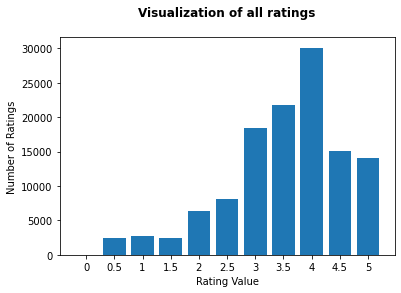

In [ ]:

arr_rating = [0,0,0,0,0,0,0,0,0,0,0]

for rating in user_data['Rating']:
  arr_rating[int(2*float(rating))] += 1

bins = ["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"]

plt.bar(bins, arr_rating)

plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')

plt.title('Visualization of all ratings\n', fontweight ="bold")

plt.show()



**Ratings of the ten most popular movies**

['Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Lord of the Rings: The Two Towers, The (2002)', 'Lord of the Rings: The Return of the King, The (2003)', 'Shrek (2001)', 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', 'Dark Knight, The (2008)', 'Finding Nemo (2003)', 'Kill Bill: Vol. 1 (2003)', 'Monsters, Inc. (2001)', "Ocean's Eleven (2001)"]


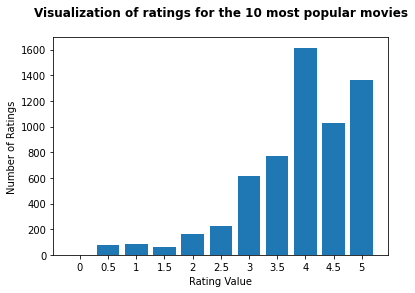

In [ ]:
arr_most_rating = {}

for movie in user_data['Movie ID']:
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
  else:
    arr_most_rating[movie] = 1

ten_highest_ratings = dict(sorted(arr_most_rating.items(), key = itemgetter(1), reverse = True)[:10])

list_most_rating_names = []
for key in ten_highest_ratings:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie ID'][i] == key:
      list_most_rating_names.append(movie_data['Movie Title'][i])
print(list_most_rating_names)
arr_rating = [0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(list_most_rating_names)):
  curr_mov_id = list(ten_highest_ratings.keys())[i]
  curr_name = list_most_rating_names[i]

  for i in range(len(user_data['Movie ID'])):
    if user_data['Movie ID'][i] == curr_mov_id:
      arr_rating[int(2*float(user_data['Rating'][i]))] += 1

plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')

plt.title('Visualization of ratings for the 10 most popular movies\n', fontweight ="bold")
bins = ["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"]
plt.bar(bins, arr_rating)
plt.show()




**Ratings of the ten best movies**

['Planet Earth (2006)', 'Black Mirror: White Christmas (2014)', 'Akeelah and the Bee (2006)', 'Barbarian Invasions, The (Les invasions barbares) (2003)', 'Louis C.K.: Live at The Comedy Store (2015)', "Blue Is the Warmest Color (La vie d'Adèle) (2013)", 'Elite Squad: The Enemy Within (Tropa de Elite 2 - O Inimigo Agora É Outro) (2010)', 'City of God (Cidade de Deus) (2002)', 'Incendies (2010)', 'Piper (2016)']
{'1020': 4.467741935483871, '157': 4.454545454545454, '53': 4.3, '120': 4.275, '811': 4.264705882352941, '171': 4.258620689655173, '393': 4.241935483870968, '258': 4.201465201465202, '646': 4.1875, '1009': 4.176470588235294}


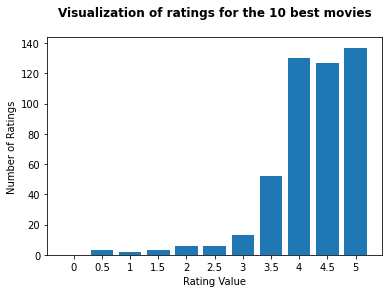

In [ ]:
arr_most_rating = {}
arr_sum_rating = {}

for i in range(len(user_data['Movie ID'])):
  movie = user_data['Movie ID'][i]
  rating = user_data['Rating'][i]
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
    arr_sum_rating[movie] += float(rating)
  else:
    arr_most_rating[movie] = 1
    arr_sum_rating[movie] = float(rating)

avg_rating = {}
for key in arr_most_rating:
  num_occ = arr_most_rating[key]
  sum_of_ratings = arr_sum_rating[key]
  avg = sum_of_ratings/num_occ
  avg_rating[key]= avg


ten_highest_ratings = dict(sorted(avg_rating.items(), key = itemgetter(1), reverse = True)[:10])

list_most_rating_names = []
for key in ten_highest_ratings:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie ID'][i] == key:
      list_most_rating_names.append(movie_data['Movie Title'][i])

print(list_most_rating_names)
print(ten_highest_ratings)

arr_rating = [0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(list_most_rating_names)):
  curr_mov_id = list(ten_highest_ratings.keys())[i]
  curr_name = list_most_rating_names[i]

  for i in range(len(user_data['Movie ID'])):
    if user_data['Movie ID'][i] == curr_mov_id:
      arr_rating[int(2*float(user_data['Rating'][i]))] += 1


plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')

plt.title('Visualization of ratings for the 10 best movies\n', fontweight ="bold")
bins = ["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"]
plt.bar(bins, arr_rating)
plt.show()

Ratings from three different genres

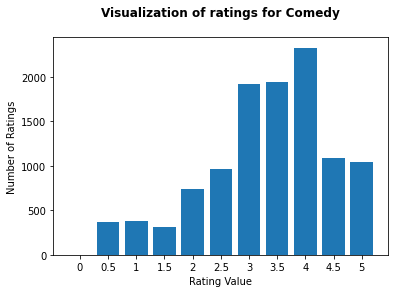

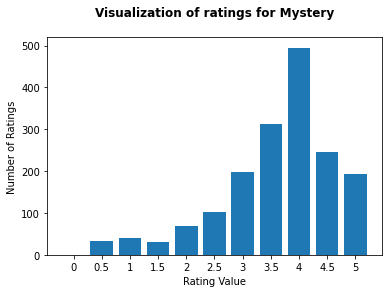

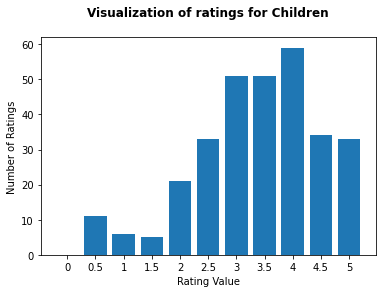

In [ ]:
for genre in ['Comedy', 'Mystery', 'Children']:

  ratings = [0,0,0,0,0,0,0,0,0,0,0]
  for i in range(len(user_data['Movie ID'])):
    movie_id = user_data['Movie ID'][i]
    keys = list(movie_data.keys())
    mov_genre = ''
    for j in range(2,len(keys)):
      if movie_data[keys[j]][int(movie_id)] != '0':
        mov_genre = keys[j]
    if mov_genre == genre:
     ratings[int(2*float(user_data['Rating'][i]))] += 1

  plt.xlabel('Rating Value')
  plt.ylabel('Number of Ratings')
  title = 'Visualization of ratings for '+ genre + '\n'
  plt.title(title, fontweight ="bold")
  bins = ["0","0.5","1","1.5","2","2.5","3","3.5","4","4.5","5"]
  plt.bar(bins, ratings)
  plt.show()
  print()

